<a href="https://colab.research.google.com/github/hgup/crop-insurance/blob/main/pmfby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
# Google Colab
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

# Gspread

In [150]:
# @title Open Existing sheet
# worksheet = gc.open('PMFBY_coverage').sheet1
# # get_all_values gives a list of rows.
# rows = worksheet.get_all_values()

# # Convert to a DataFrame and render.
# import pandas as pd
# df = pd.DataFrame.from_records(rows[1:])


In [151]:
# @title Create new Sheet

# gc = gspread.authorize(creds)
# sh = gc.create('A new spreadsheet')
# # Open our new sheet and add some data.
# worksheet = gc.open('A new spreadsheet').sheet1
# cell_list = worksheet.range('A1:C2')
# import random
# for cell in cell_list:
#   cell.value = random.randint(1, 10)
# worksheet.update_cells(cell_list)
# # Go to https://sheets.google.com to see your new spreadsheet.

In [152]:
# @title Put unique values on the sheet
# ws = gc.open('PMFBY_coverage').worksheet('values')
# for i in range(62):
#     t = df.iloc[:,i].unique()
#     ws.update_cell(i+2, 2, df.columns[i])
#     ws.update_cell(i+2,3,len(t))
#     for j in range(len(t) if len(t) <= 5 else 5):
#         ws.update_cell(i+2,j+4,t[j])

# later change this code such that you can put the for j in range update in one command call


# Analysis

In [153]:
# @title Load Data
worksheet = gc.open('PMFBY_coverage').worksheet('premiums')
# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# Convert to a DataFrame and render.
import pandas as pd
df = pd.DataFrame.from_records(rows[1:])

In [154]:
df.columns = rows[0]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   sssyName.year                          29999 non-null  object
 1   sssyName.seasonName                    29999 non-null  object
 2   sssyName.schemeName                    29999 non-null  object
 3   sssyName.stateName                     29999 non-null  object
 4   level3Name                             29999 non-null  object
 5   cropName                               29999 non-null  object
 6   sumInsured                             29999 non-null  object
 7   premiumRate                            29999 non-null  object
 8   stateShare                             29999 non-null  object
 9   goiShare                               29999 non-null  object
 10  sssyID                                 29999 non-null  object
 11  seasonID       

In [155]:
# for i in range(62):
#     t = df.iloc[:,i].unique()
#     print(df.columns[i],"\t:(",len(t),")\t",t[:5])

In [156]:
# @title Data Shape
print(df.shape)
df.head(10)

(29999, 62)


,sssyName.year,sssyName.seasonName,sssyName.schemeName,sssyName.stateName,level3Name,cropName,sumInsured,premiumRate,stateShare,goiShare,...,insuranceCompanyName,cutOfDate,tollFreeNumber,headQuaterAddress,headQuaterEmail,websiteLink,sssyName.schemeNameShort,insuranceCompany.insuranceCompanyID,insuranceCompany.insuranceCompanyCode,insuranceCompany.insuranceCompanyName
0,2021,Kharif,Pradhan Mantri Fasal Bima Yojana,Goa,North Goa,Pulses,"37,500.00",2.00,0.00,0.00,...,FUTURE GENERALI INDIA INSURANCE CO. LTD.,7/31/21 18:29,18002664141,"Indiabulls Finance Centre, 6th Floor, Tower 3,...",fgcare@futuregenerali.in,https://general.futuregenerali.in/,PMFBY,D19CD684-BCCB-4575-BC6B-0687572B0D3F,1005,FUTURE GENERALI INDIA INSURANCE CO. LTD.
1,2021,Kharif,Pradhan Mantri Fasal Bima Yojana,Goa,North Goa,Groundnut (Pea Nut),"47,500.00",2.00,0.00,0.00,...,FUTURE GENERALI INDIA INSURANCE CO. LTD.,7/31/21 18:29,18002664141,"Indiabulls Finance Centre, 6th Floor, Tower 3,...",fgcare@futuregenerali.in,https://general.futuregenerali.in/,PMFBY,D19CD684-BCCB-4575-BC6B-0687572B0D3F,1005,FUTURE GENERALI INDIA INSURANCE CO. LTD.
2,2022,Kharif,Pradhan Mantri Fasal Bima Yojana,HARYANA,Fatehabad,Cotton (Kapas),"89,903.00",12.00,3.50,3.50,...,BAJAJ ALLIANZ GENERAL INSURANCE CO. LTD,8/1/22 18:29,18002095959,"Bajaj Allianz House, Airport Road, Yerawada, P...",bagichelp@bajajallianz.co.in,www.bajajallianz.com,PMFBY,AED99B42-6EE5-47A7-A637-730EB24563B8,1004,BAJAJ ALLIANZ GENERAL INSURANCE CO. LTD
3,2018,Kharif,Pradhan Mantri Fasal Bima Yojana,Haryana,Sonipat,Maize (Makka),"41,500.00",7.00,2.50,2.50,...,SBI GENERAL INSURANCE,7/31/18 18:29,1800 22 1111 \n 1800 102 1111,"9th Floor, A&B wing, Fulcrum Building, Sahar R...",customer.care@sbigeneral.in,www.sbigeneral.in,PMFBY,FE754761-1650-40EF-B4CE-DD5EAFF04478,1012,SBI GENERAL INSURANCE
4,2018,Kharif,Pradhan Mantri Fasal Bima Yojana,Haryana,Panchkula,Cotton (Kapas),"72,000.00",12.99,7.00,4.00,...,ORIENTAL INSURANCE,7/31/18 18:29,1800118485,"The Oriental Insurance Company Ltd.Crop Cell, ...",crop.grievance@orientalinsurance.co.in,www.orientalinsurance.org.in,PMFBY,9A02DE3E-04CB-4293-8C91-1ED779834C53,1015,ORIENTAL INSURANCE
5,2018,Kharif,Pradhan Mantri Fasal Bima Yojana,Haryana,Panchkula,Paddy (Dhan),"73,500.00",14.93,6.47,6.47,...,ORIENTAL INSURANCE,7/31/18 18:29,1800118485,"The Oriental Insurance Company Ltd.Crop Cell, ...",crop.grievance@orientalinsurance.co.in,www.orientalinsurance.org.in,PMFBY,9A02DE3E-04CB-4293-8C91-1ED779834C53,1015,ORIENTAL INSURANCE
6,2018,Rabi,Pradhan Mantri Fasal Bima Yojana,Chhattisgarh,Bemetara,Linseed (Alsi),"11,200.00",5.00,1.75,1.75,...,BAJAJ ALLIANZ GENERAL INSURANCE CO. LTD,12/31/18 18:29,18002095959,"Bajaj Allianz House, Airport Road, Yerawada, P...",bagichelp@bajajallianz.co.in,www.bajajallianz.com,PMFBY,AED99B42-6EE5-47A7-A637-730EB24563B8,1004,BAJAJ ALLIANZ GENERAL INSURANCE CO. LTD
7,2018,Kharif,Pradhan Mantri Fasal Bima Yojana,Haryana,Sonipat,Pearl Millet (Bajra),"36,000.00",5.00,1.50,1.50,...,SBI GENERAL INSURANCE,7/31/18 18:29,1800 22 1111 \n 1800 102 1111,"9th Floor, A&B wing, Fulcrum Building, Sahar R...",customer.care@sbigeneral.in,www.sbigeneral.in,PMFBY,FE754761-1650-40EF-B4CE-DD5EAFF04478,1012,SBI GENERAL INSURANCE
8,2022,Kharif,Pradhan Mantri Fasal Bima Yojana,HARYANA,Fatehabad,Maize (Makka),"46,314.00",13.00,5.50,5.50,...,BAJAJ ALLIANZ GENERAL INSURANCE CO. LTD,8/1/22 18:29,18002095959,"Bajaj Allianz House, Airport Road, Yerawada, P...",bagichelp@bajajallianz.co.in,www.bajajallianz.com,PMFBY,AED99B42-6EE5-47A7-A637-730EB24563B8,1004,BAJAJ ALLIANZ GENERAL INSURANCE CO. LTD
9,2018,Rabi,Pradhan Mantri Fasal Bima Yojana,Chhattisgarh,Bemetara,Wheat - IR,"30,000.00",4.00,1.25,1.25,...,BAJAJ ALLIANZ GENERAL INSURANCE CO. LTD,12/31/18 18:29,18002095959,"Bajaj Allianz House, Airport Road, Yerawada, P...",bagichelp@bajajallianz.co.in,www.bajajallianz.com,PMFBY,AED99B42-6EE5-47A7-A637-730EB24563B8,1004,BAJAJ ALLIANZ GENERAL INSURANCE CO. LTD


In [157]:
# @title Null values?
# df.info()
print("Null values present?: ",df.isnull().any().any())

Null values present?:  False


In [158]:
df['cropName'].value_counts(normalize=True).head(40)

Black Gram (Urad)                       0.038768
Maize (Makka)                           0.036301
Mustard                                 0.035868
Paddy (Dhan)                            0.034934
Bengal Gram (Chana)                     0.034068
Potato                                  0.030434
Groundnut (Pea Nut)                     0.029234
Tomato                                  0.028868
Wheat                                   0.027201
Banana                                  0.026368
Pigeon Pea (Red Gram/Arhar/Tur)         0.025501
Onion                                   0.025368
Green Gram (Moong)                      0.023867
Pearl Millet (Bajra)                    0.023834
Brinjal                                 0.021334
Sorghum (Jowar/Great Millet)            0.020601
Wheat - IR                              0.018701
Sesame (Gingelly/Til)/Sesamum           0.018501
Cotton (Kapas)                          0.016601
Soybean (Bhat)                          0.015101
Lentil (Masur)      

In [176]:
# @title Get Selected Columns (run only when you update the sheets)

ws = gc.open('PMFBY_coverage').worksheet('values')
_selected_columns_r = ws.get_all_values()
selected = [True if _selected_columns_r[i][0]=='TRUE' else False for i in range(1,63)]

In [177]:
df['sssyName.stateName'] = df['sssyName.stateName'].apply(lambda x: x.lower() if isinstance(x, str) else x)

In [178]:
X = df.iloc[:,selected]
y = df.iloc[:, 7]

In [179]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   sssyName.year                  29999 non-null  object
 1   sssyName.seasonName            29999 non-null  object
 2   level3Name                     29999 non-null  object
 3   isPreviousSeasonYearInSubsidy  29999 non-null  object
 4   firstGoiSubsidy                29999 non-null  object
 5   pickingType                    29999 non-null  object
 6   categoryName                   29999 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [180]:
y = y.astype(float)
y.describe()

count    29999.000000
mean        14.488063
std         10.869199
min          0.150000
25%          5.500000
50%         11.330000
75%         21.645000
max         85.000000
Name: premiumRate, dtype: float64

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date

In [182]:
# @title Imputation (not required)
X.isnull().sum().sort_values(ascending=False).head(20)

sssyName.year                    0
sssyName.seasonName              0
level3Name                       0
isPreviousSeasonYearInSubsidy    0
firstGoiSubsidy                  0
pickingType                      0
categoryName                     0
dtype: int64

In [183]:
# @title Encoding
X = pd.get_dummies(X)

In [184]:
X.columns

Index(['sssyName.year_2018', 'sssyName.year_2019', 'sssyName.year_2020',
       'sssyName.year_2021', 'sssyName.year_2022',
       'sssyName.seasonName_Kharif', 'sssyName.seasonName_Rabi',
       'level3Name_Adilabad', 'level3Name_Agar Malwa', 'level3Name_Agra',
       ...
       'categoryName_Fodder Crops', 'categoryName_Fruits',
       'categoryName_Medicinal and Aromatic Plants', 'categoryName_Millets',
       'categoryName_Oilseeds', 'categoryName_Oilseeds - HORT',
       'categoryName_Plantation Crops', 'categoryName_Pulses',
       'categoryName_Sugar and Starch Crops', 'categoryName_Vegetables'],
      dtype='object', length=646)

In [185]:
# @title `y` Scaling
min_y = min(y)
max_y = max(y)
range_y = max_y - min_y
y = y.map(lambda r: (r - min_y)/range_y)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=20, random_state = 0)
rf_regressor.fit(X,y)

In [ ]:
features = list(X.columns)
importances = list(rf_regressor.feature_importances_)
sorted_importance = sorted([i for i in zip(features,importances,range(len(features)))],key= lambda x: x[1],reverse=True)
# sorted_importance = np.array(sorted_importance)
most_important_features = pd.DataFrame(sorted_importance, columns=['Feature','Importance','Index']).head(50)
most_important_features.head(20)

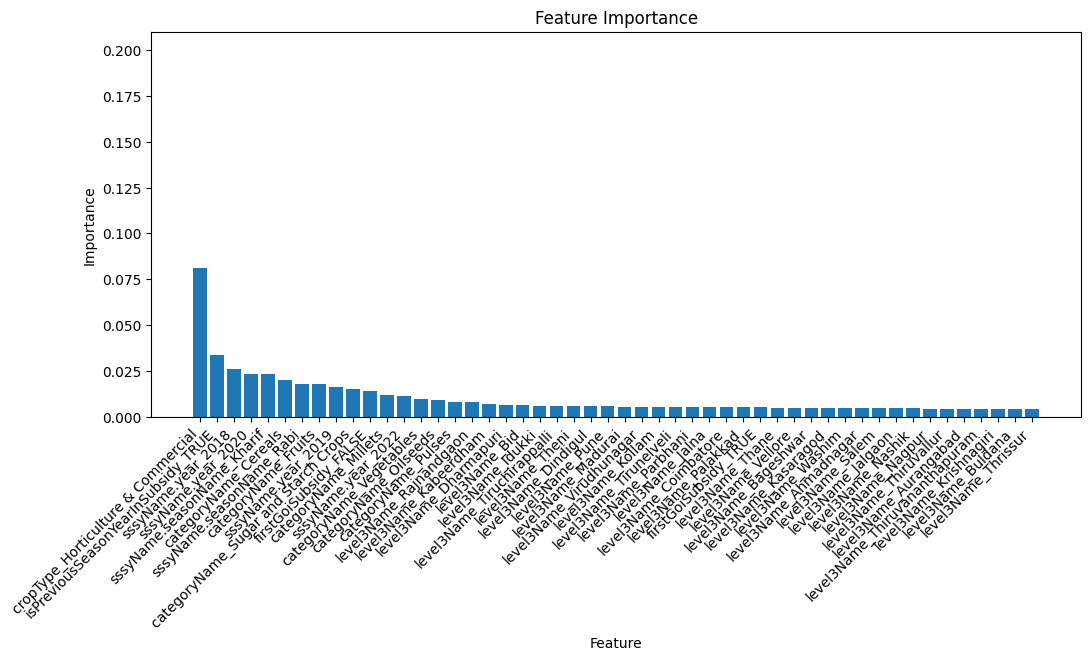

In [171]:
# @title Feature Importance

from matplotlib import pyplot as plt

fig = plt.figure(figsize=(12,5))
plt.bar(most_important_features["Feature"], most_important_features["Importance"], orientation = 'vertical')

plt.xticks(most_important_features["Feature"], rotation=45, ha="right")
plt.ylim(0,0.21)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importance')
plt.show()

# most_important_features['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
# plt.xticks(most_important_features["Feature"], rotation=45, ha="right")
# plt.gca().spines[['top', 'right']].set_visible(False)

In [172]:
# @title Enter Factors to Predict Premium
import ipywidgets as widgets
from ipywidgets import Box, Layout
box_layout = Layout(display='flex',
                    flex_flow='column',
                    # align_items='stretch',
                    # border='solid',
                    width='80%'
                    )

seasons = df['sssyName.seasonName'].unique()
# cropNames = df['cropName'].unique()
level3Names = df['level3Name'].unique()
# states = df['sssyName.stateName'].unique()
pickingTypes = df['pickingType'].unique()
categoryNames = df['categoryName'].unique()
season_picker = widgets.ToggleButtons(
    options=seasons,
    description='Season',
)

# state_picker = widgets.Dropdown(description='State', options=states, value=states[0])
level3_picker = widgets.Dropdown(description='District',options=level3Names, value=level3Names[0])
# crop_picker = widgets.Dropdown(description='Crop',options=cropNames, value=cropNames[0])
pickingType_picker = widgets.ToggleButtons(
    options=pickingTypes,
    description='Season',
)
categoryName_picker = widgets.Dropdown(description='Category',options=categoryNames, value=categoryNames[0])
year_picker = widgets.FloatSlider(description='Year',
    value=2018,
    min=2018, max=2023, step=1,
    readout_format='.0f',
 )
prevYearSubsidy_picker = widgets.ToggleButton(
    value=False,
    description='Prev Year Subsidy?',
    icon='check'
)

firstGOISubsidy_picker = widgets.ToggleButton(
    value=False,
    description='First GOI Subsidy?',
    icon='check'
)

boolBox = Box(children=[ prevYearSubsidy_picker, firstGOISubsidy_picker])

items = [season_picker, pickingType_picker,  level3_picker,categoryName_picker, year_picker,boolBox]
box = Box(children=items, layout=box_layout)
box

Box(children=(ToggleButtons(description='Season', options=('Kharif', 'Rabi'), value='Kharif'), ToggleButtons(d…

In [ ]:
# prompt: get all values from the previous code block and make a pandas dataframe object with the same structure as that of X and these values

df_new = pd.DataFrame(columns=list(df.columns[selected]))
df_new.loc[0] = [
    year_picker.value,
    season_picker.value,
    level3_picker.value,
    prevYearSubsidy_picker.value,
    firstGOISubsidy_picker.value,
    pickingType_picker.value,
    categoryName_picker.value,
]
df_new = pd.get_dummies(df_new)


In [175]:
list(df.columns[selected])

['sssyName.year',
 'sssyName.seasonName',
 'level3Name',
 'isPreviousSeasonYearInSubsidy',
 'firstGoiSubsidy',
 'pickingType',
 'categoryName',
 'cropType']